In [ ]:
!pip install opencv-python scikit-image


In [ ]:
import cv2
import numpy as np
from skimage import measure, morphology
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import glob


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(f'{folder}/*.jpg'):  # puedes cambiar la extensión si tus imágenes no son .jpg
        img = cv2.imread(filename)
        if img is not None:
            images.append(img)
    return images


In [ ]:
folder1 = 'path_to_sample1'
folder2 = 'path_to_sample2'
folder3 = 'path_to_sample3'

images1 = load_images_from_folder(folder1)
images2 = load_images_from_folder(folder2)
images3 = load_images_from_folder(folder3)

In [ ]:
def process_image(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para binarizar la imagen
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Eliminar ruido con operaciones morfológicas
    binary = morphology.remove_small_objects(binary > 0, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)

    # Etiquetar las regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def analyze_flocs(labeled_image):
    # Obtener las propiedades de las regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Extraer áreas y perímetros
    areas = [prop.area for prop in properties]
    perimeters = [prop.perimeter for prop in properties]

    return areas, perimeters

def analyze_images(images):
    all_areas = []
    all_perimeters = []

    for image in images:
        labeled_image = process_image(image)
        areas, perimeters = analyze_flocs(labeled_image)
        all_areas.extend(areas)
        all_perimeters.extend(perimeters)

    return all_areas, all_perimeters


Sample 1 - Number of flocs: 0
Sample 2 - Number of flocs: 0
Sample 3 - Number of flocs: 0


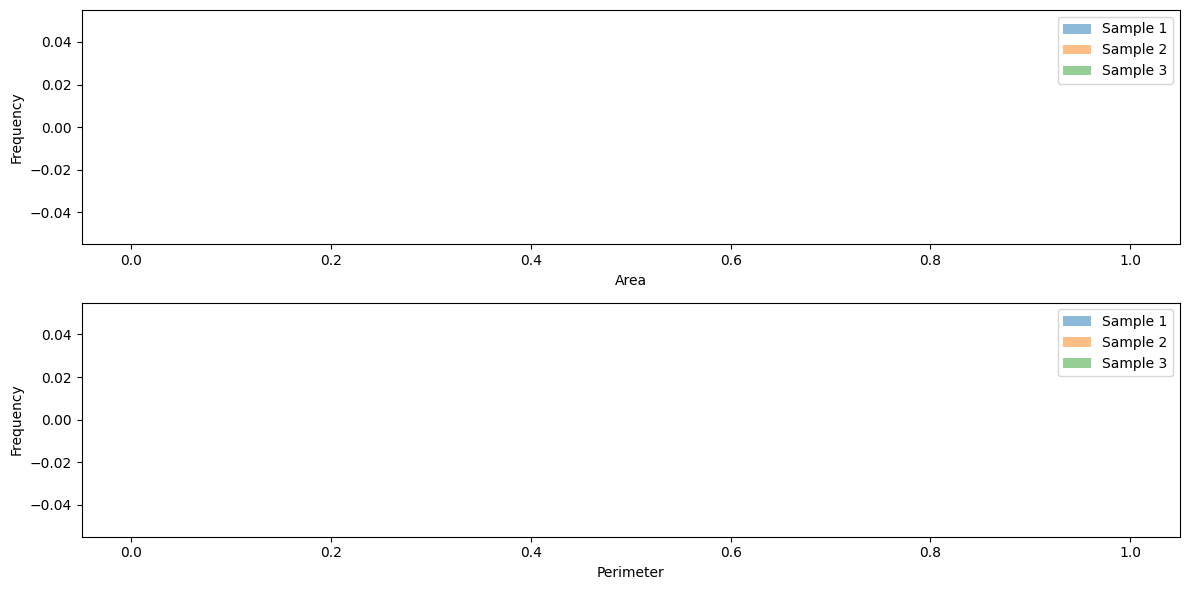

In [ ]:
# Analizar cada conjunto de imágenes
areas1, perimeters1 = analyze_images(images1)
areas2, perimeters2 = analyze_images(images2)
areas3, perimeters3 = analyze_images(images3)

# Mostrar algunos resultados
print(f'Sample 1 - Number of flocs: {len(areas1)}')
print(f'Sample 2 - Number of flocs: {len(areas2)}')
print(f'Sample 3 - Number of flocs: {len(areas3)}')

# Puedes usar matplotlib para visualizar histogramas de áreas y perímetros
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(areas1, bins=30, alpha=0.5, label='Sample 1')
plt.hist(areas2, bins=30, alpha=0.5, label='Sample 2')
plt.hist(areas3, bins=30, alpha=0.5, label='Sample 3')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(perimeters1, bins=30, alpha=0.5, label='Sample 1')
plt.hist(perimeters2, bins=30, alpha=0.5, label='Sample 2')
plt.hist(perimeters3, bins=30, alpha=0.5, label='Sample 3')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Función para cargar imágenes desde una carpeta
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(f'{folder}/*.jpg'):  # Cambia la extensión si tus imágenes no son .jpg
        img = cv2.imread(filename)
        if img is not None:
            images.append(img)
    return images

In [ ]:
folder1 = '/content/drive/MyDrive/Tratamiento de agua/Muestra 3  linaza/dosis 1'
folder2 = '/content/drive/MyDrive/Tratamiento de agua/Muestra 3  linaza/dosis 2'
folder3 = '/content/drive/MyDrive/Tratamiento de agua/Muestra 3  linaza/dosis 3'

In [ ]:
# Cargar las imágenes
images1 = load_images_from_folder(folder1)
images2 = load_images_from_folder(folder2)
images3 = load_images_from_folder(folder3)


In [ ]:

print(f'Loaded {len(images1)} images from Dose 1')
print(f'Loaded {len(images2)} images from Dose 2')
print(f'Loaded {len(images3)} images from Dose 3')

Loaded 660 images from Dose 1
Loaded 273 images from Dose 2
Loaded 380 images from Dose 3


Sample 1 - Number of flocs: 13815
Sample 2 - Number of flocs: 6672
Sample 3 - Number of flocs: 1654


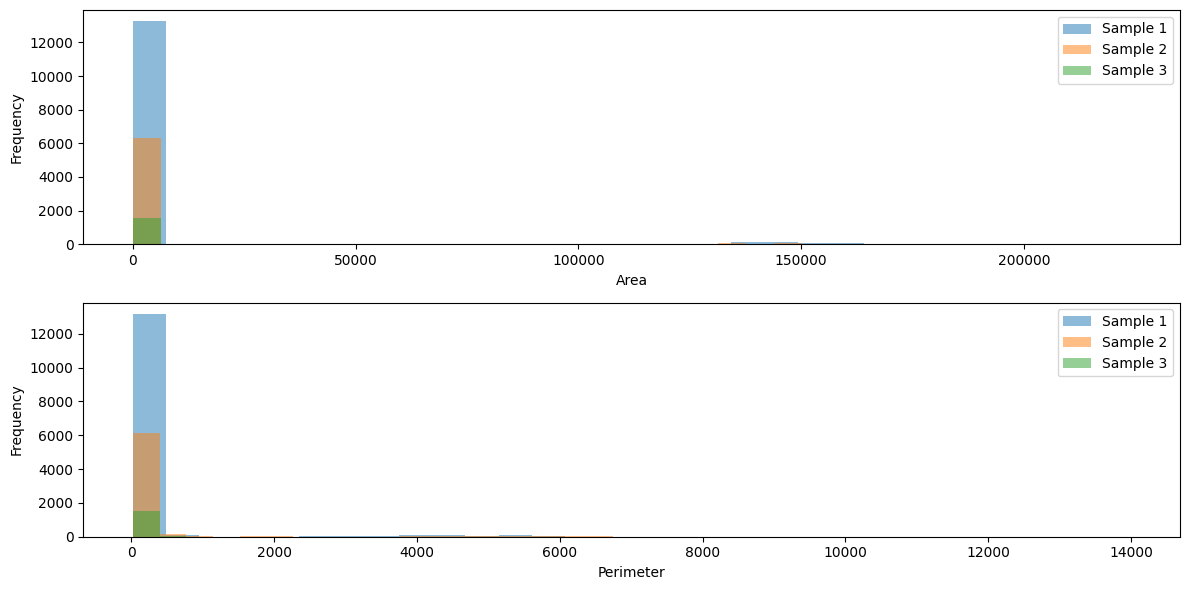

In [ ]:
def process_image(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para binarizar la imagen
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Eliminar ruido con operaciones morfológicas
    binary = morphology.remove_small_objects(binary > 0, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)

    # Etiquetar las regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def analyze_flocs(labeled_image):
    # Obtener las propiedades de las regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Extraer áreas y perímetros
    areas = [prop.area for prop in properties]
    perimeters = [prop.perimeter for prop in properties]

    return areas, perimeters

def analyze_images(images):
    all_areas = []
    all_perimeters = []

    for image in images:
        labeled_image = process_image(image)
        areas, perimeters = analyze_flocs(labeled_image)
        all_areas.extend(areas)
        all_perimeters.extend(perimeters)

    return all_areas, all_perimeters

# Analizar cada conjunto de imágenes
areas1, perimeters1 = analyze_images(images1)
areas2, perimeters2 = analyze_images(images2)
areas3, perimeters3 = analyze_images(images3)

# Mostrar algunos resultados
print(f'Sample 1 - Number of flocs: {len(areas1)}')
print(f'Sample 2 - Number of flocs: {len(areas2)}')
print(f'Sample 3 - Number of flocs: {len(areas3)}')

# Puedes usar matplotlib para visualizar histogramas de áreas y perímetros
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(areas1, bins=30, alpha=0.5, label='Sample 1')
plt.hist(areas2, bins=30, alpha=0.5, label='Sample 2')
plt.hist(areas3, bins=30, alpha=0.5, label='Sample 3')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(perimeters1, bins=30, alpha=0.5, label='Sample 1')
plt.hist(perimeters2, bins=30, alpha=0.5, label='Sample 2')
plt.hist(perimeters3, bins=30, alpha=0.5, label='Sample 3')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def process_image(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para binarizar la imagen
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Eliminar ruido con operaciones morfológicas
    binary = morphology.remove_small_objects(binary > 0, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)

    # Etiquetar las regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def highlight_floc_zones(image, labeled_image):
    # Convertir la imagen original a RGB si no lo está
    if len(image.shape) == 2 or image.shape[2] == 1:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        image_rgb = image.copy()

    # Obtener las propiedades de las regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Dibujar rectángulos alrededor de los flóculos
    for prop in properties:
        minr, minc, maxr, maxc = prop.bbox
        cv2.rectangle(image_rgb, (minc, minr), (maxc, maxr), (255, 0, 0), 2)  # Dibuja en azul

    return image_rgb

def analyze_and_highlight_images(images):
    highlighted_images = []

    for image in images:
        labeled_image = process_image(image)
        highlighted_image = highlight_floc_zones(image, labeled_image)
        highlighted_images.append(highlighted_image)

    return highlighted_images


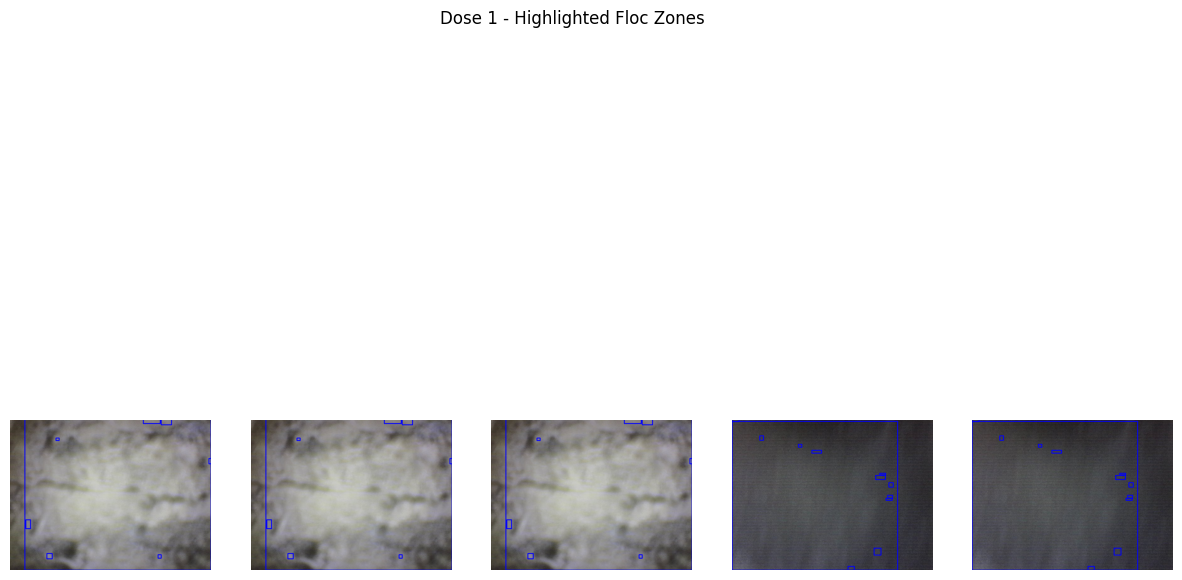

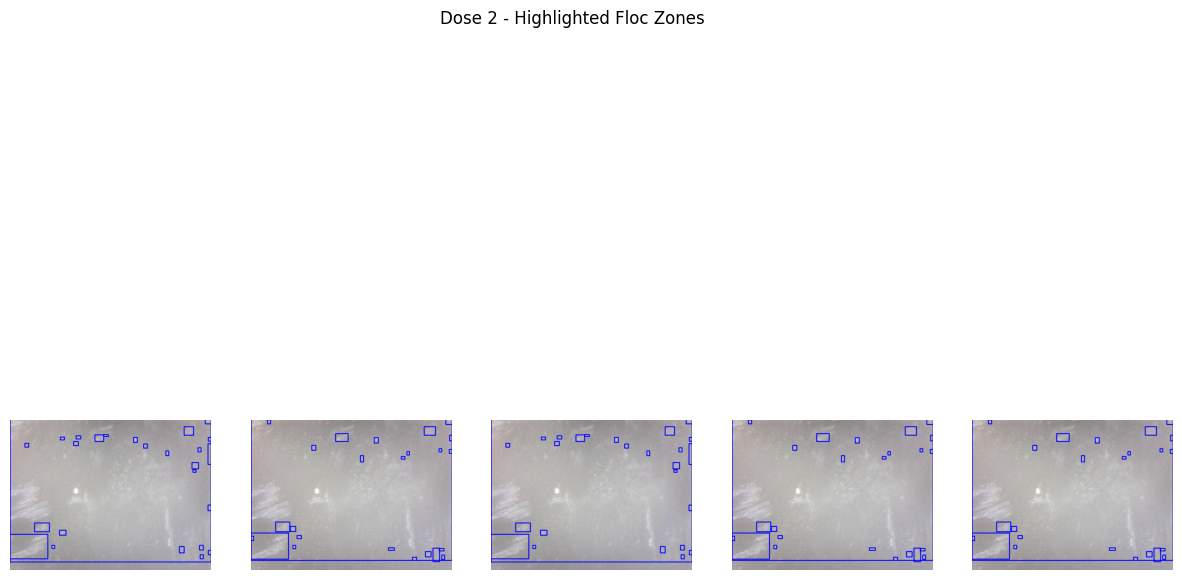

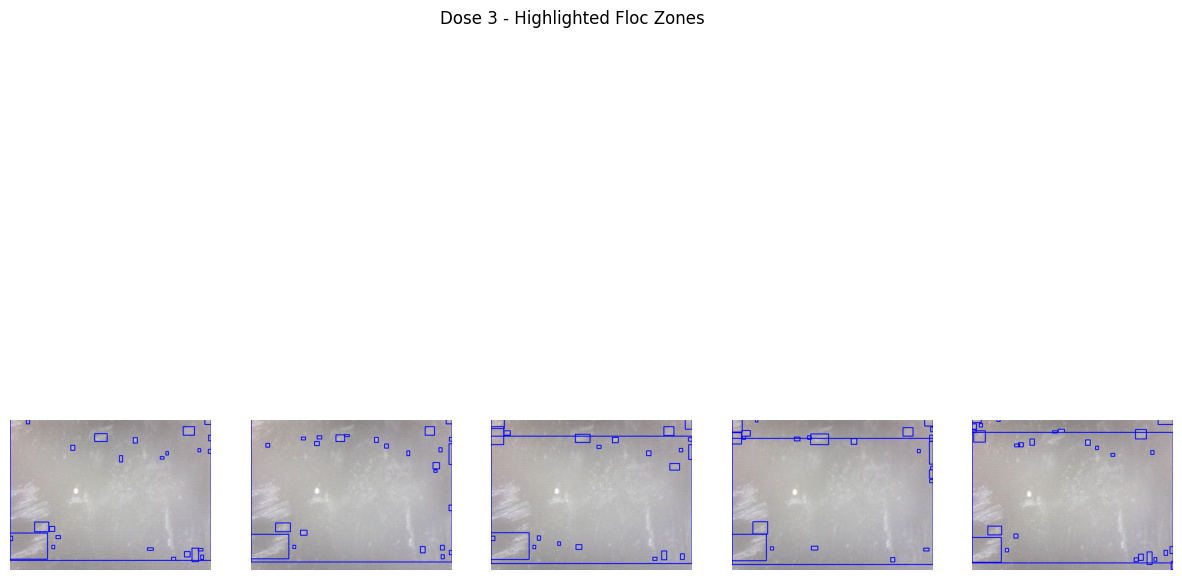

In [ ]:
# Analizar y resaltar zonas en cada conjunto de imágenes
highlighted_images1 = analyze_and_highlight_images(images1)
highlighted_images2 = analyze_and_highlight_images(images2)
highlighted_images3 = analyze_and_highlight_images(images3)

# Mostrar algunas imágenes resaltadas
def display_images(images, title):
    plt.figure(figsize=(15, 10))
    for i, image in enumerate(images[:5]):  # Mostrar las primeras 5 imágenes como ejemplo
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_images(highlighted_images1, 'Dose 1 - Highlighted Floc Zones')
display_images(highlighted_images2, 'Dose 2 - Highlighted Floc Zones')
display_images(highlighted_images3, 'Dose 3 - Highlighted Floc Zones')


     Dose  Number of Flocs    Mean Area  Median Area  Mean Perimeter  \
0  Dose 1            13815  6154.565689         98.0      269.393949   
1  Dose 2             6672  6986.815947        110.0      358.632207   
2  Dose 3             1654  6832.435308        110.0      353.268968   

   Median Perimeter  
0         49.213203  
1         55.748737  
2         55.455844  


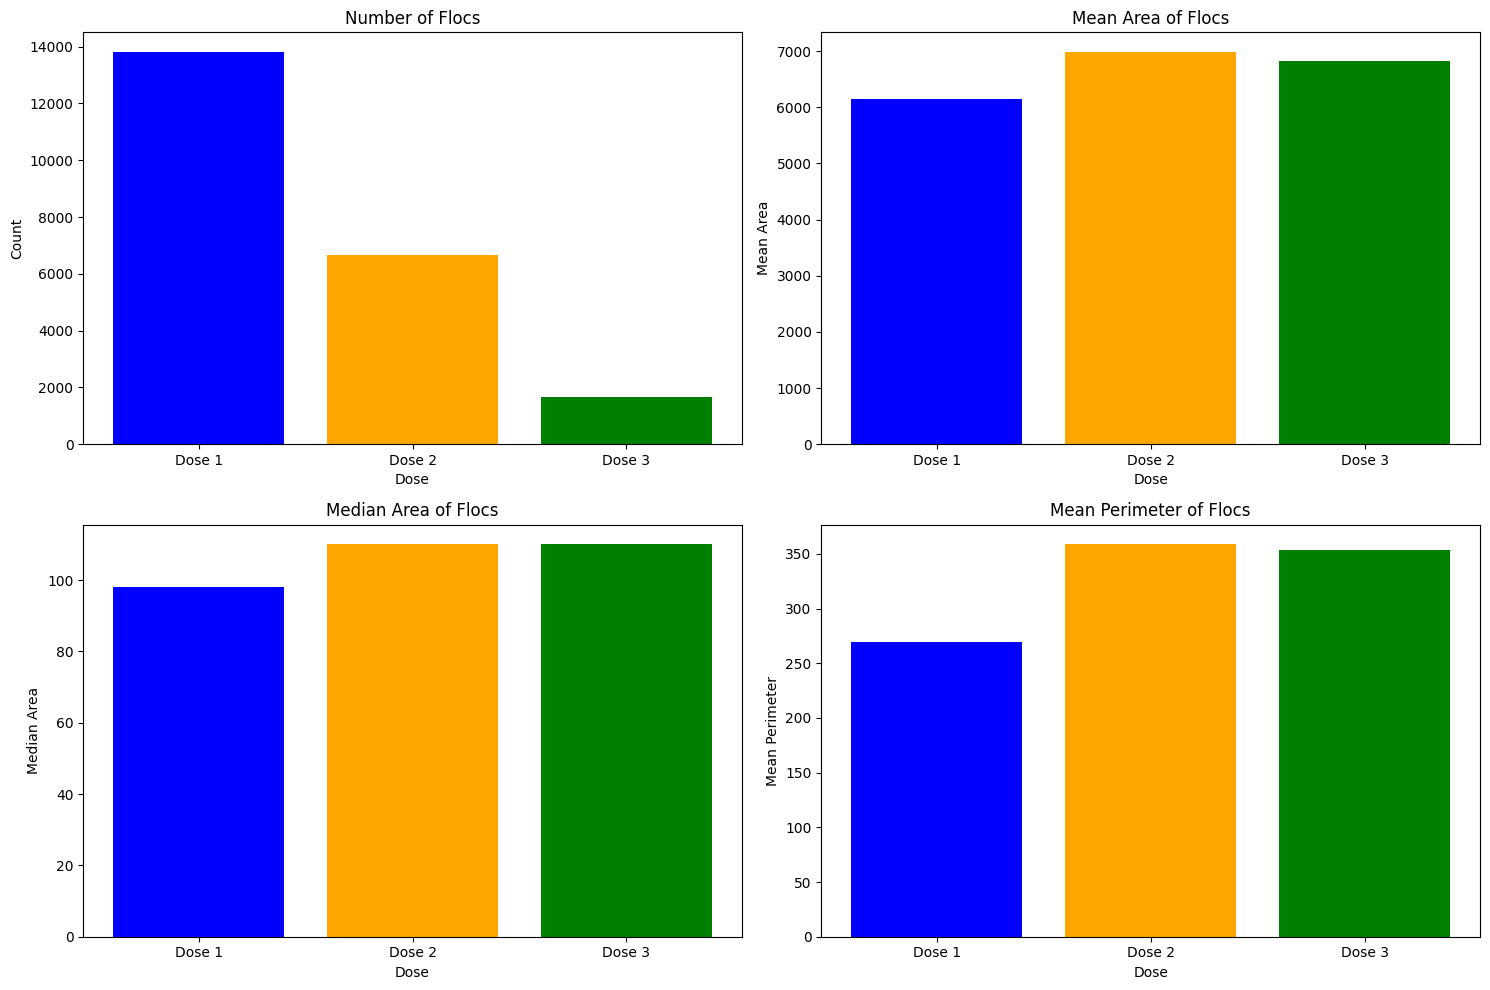

In [ ]:
import pandas as pd

# Analizar cada conjunto de imágenes
areas1, perimeters1 = analyze_images(images1)
areas2, perimeters2 = analyze_images(images2)
areas3, perimeters3 = analyze_images(images3)

# Crear un DataFrame para mostrar los resultados estadísticos
data = {
    'Dose': ['Dose 1', 'Dose 2', 'Dose 3'],
    'Number of Flocs': [len(areas1), len(areas2), len(areas3)],
    'Mean Area': [np.mean(areas1), np.mean(areas2), np.mean(areas3)],
    'Median Area': [np.median(areas1), np.median(areas2), np.median(areas3)],
    'Mean Perimeter': [np.mean(perimeters1), np.mean(perimeters2), np.mean(perimeters3)],
    'Median Perimeter': [np.median(perimeters1), np.median(perimeters2), np.median(perimeters3)]
}

df = pd.DataFrame(data)
print(df)

# Visualizar los resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(df['Dose'], df['Number of Flocs'], color=['blue', 'orange', 'green'])
plt.title('Number of Flocs')
plt.xlabel('Dose')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.bar(df['Dose'], df['Mean Area'], color=['blue', 'orange', 'green'])
plt.title('Mean Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Area')

plt.subplot(2, 2, 3)
plt.bar(df['Dose'], df['Median Area'], color=['blue', 'orange', 'green'])
plt.title('Median Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Median Area')

plt.subplot(2, 2, 4)
plt.bar(df['Dose'], df['Mean Perimeter'], color=['blue', 'orange', 'green'])
plt.title('Mean Perimeter of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Perimeter')

plt.tight_layout()
plt.show()


In [ ]:
def process_image(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar un filtro de suavizado para reducir el ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Aplicar un umbral adaptativo para binarizar la imagen
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplicar operaciones morfológicas para eliminar el ruido
    binary = morphology.remove_small_objects(binary > 0, min_size=100)
    binary = morphology.remove_small_holes(binary, area_threshold=150)

    # Etiquetar las regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def analyze_flocs(labeled_image):
    # Obtener las propiedades de las regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Extraer áreas y perímetros
    areas = [prop.area for prop in properties]
    perimeters = [prop.perimeter for prop in properties]

    return areas, perimeters

def analyze_images(images):
    all_areas = []
    all_perimeters = []

    for image in images:
        labeled_image = process_image(image)
        areas, perimeters = analyze_flocs(labeled_image)
        all_areas.extend(areas)
        all_perimeters.extend(perimeters)

    return all_areas, all_perimeters


     Dose  Number of Flocs      Mean Area  Median Area  Mean Perimeter  \
0  Dose 1              927  176664.275081     303235.0     3716.096128   
1  Dose 2              454  235060.378855     305652.0     2739.689619   
2  Dose 3              111  233435.612613     305636.0     2751.033980   

   Median Perimeter  
0       2236.000000  
1       2446.687338  
2       2450.415260  


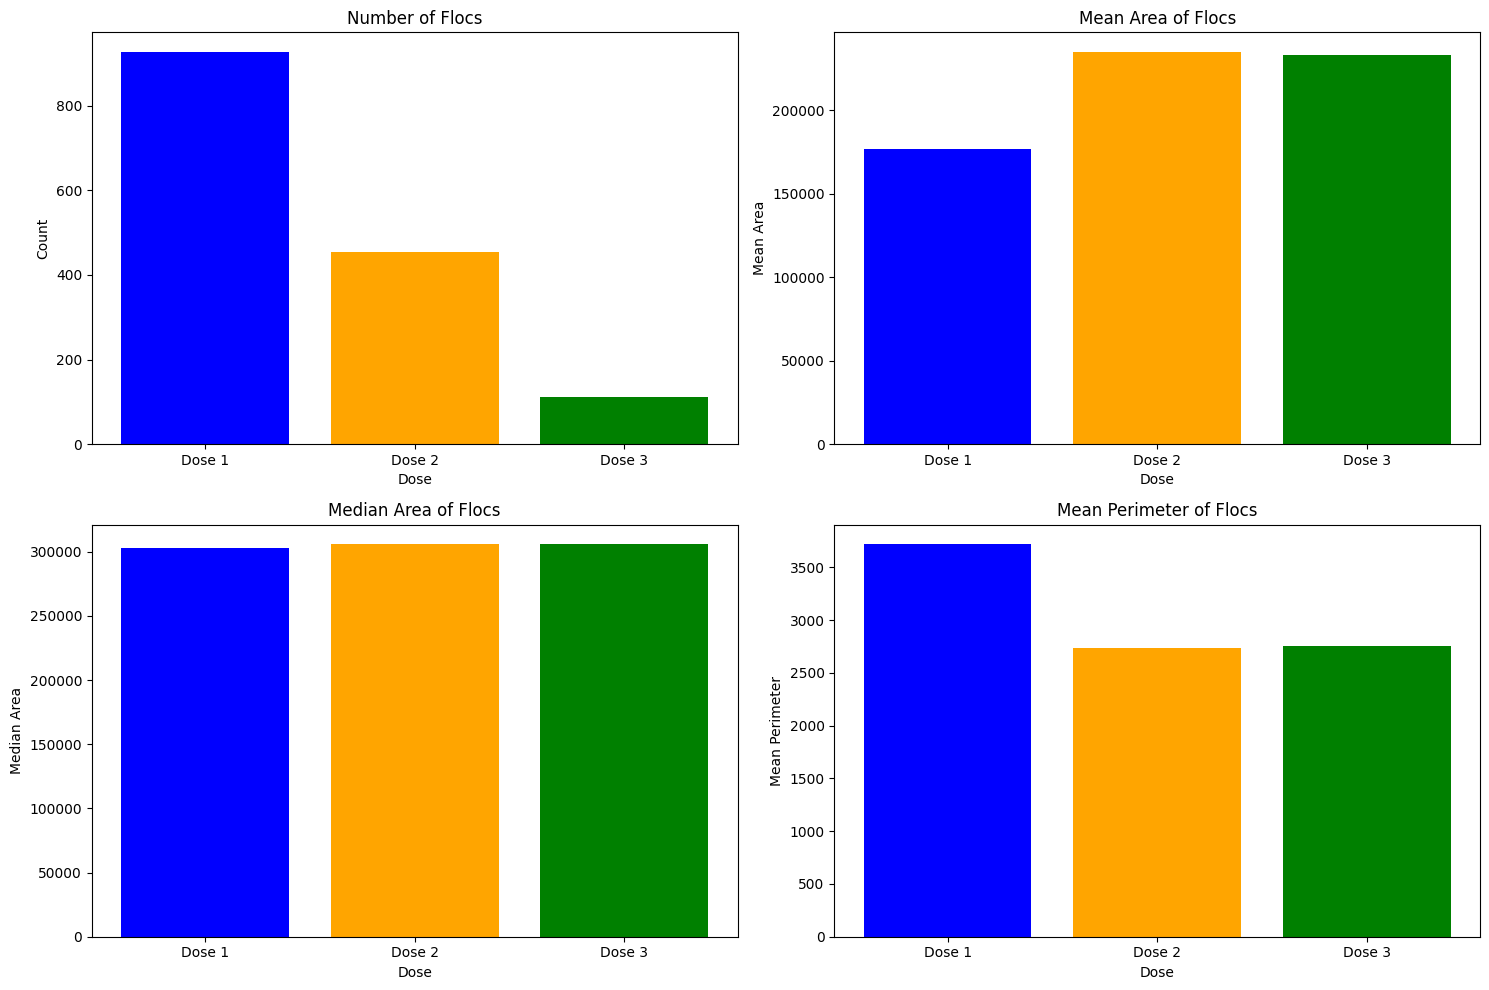

In [ ]:
# Analizar cada conjunto de imágenes
areas1, perimeters1 = analyze_images(images1)
areas2, perimeters2 = analyze_images(images2)
areas3, perimeters3 = analyze_images(images3)

# Crear un DataFrame para mostrar los resultados estadísticos
data = {
    'Dose': ['Dose 1', 'Dose 2', 'Dose 3'],
    'Number of Flocs': [len(areas1), len(areas2), len(areas3)],
    'Mean Area': [np.mean(areas1), np.mean(areas2), np.mean(areas3)],
    'Median Area': [np.median(areas1), np.median(areas2), np.median(areas3)],
    'Mean Perimeter': [np.mean(perimeters1), np.mean(perimeters2), np.mean(perimeters3)],
    'Median Perimeter': [np.median(perimeters1), np.median(perimeters2), np.median(perimeters3)]
}

df = pd.DataFrame(data)
print(df)

# Visualizar los resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(df['Dose'], df['Number of Flocs'], color=['blue', 'orange', 'green'])
plt.title('Number of Flocs')
plt.xlabel('Dose')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.bar(df['Dose'], df['Mean Area'], color=['blue', 'orange', 'green'])
plt.title('Mean Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Area')

plt.subplot(2, 2, 3)
plt.bar(df['Dose'], df['Median Area'], color=['blue', 'orange', 'green'])
plt.title('Median Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Median Area')

plt.subplot(2, 2, 4)
plt.bar(df['Dose'], df['Mean Perimeter'], color=['blue', 'orange', 'green'])
plt.title('Mean Perimeter of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Perimeter')

plt.tight_layout()
plt.show()


In [ ]:
import exposure

In [ ]:
def process_image(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar un filtro de suavizado para reducir el ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Aplicar ecualización del histograma para mejorar el contraste
    equalized = exposure.equalize_adapthist(blurred)

    # Convertir la imagen ecualizada a formato uint8
    equalized = (equalized * 255).astype(np.uint8)

    # Aplicar filtro de Canny para la detección de bordes
    edges = cv2.Canny(equalized, 100, 200)

    # Dilatar los bordes para cerrarlos
    dilated = cv2.dilate(edges, None, iterations=2)

    # Aplicar un umbral adaptativo para binarizar la imagen
    binary = cv2.adaptiveThreshold(dilated, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplicar operaciones morfológicas para eliminar el ruido
    binary = morphology.remove_small_objects(binary > 0, min_size=100)
    binary = morphology.remove_small_holes(binary, area_threshold=150)

    # Etiquetar las regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def analyze_flocs(labeled_image):
    # Obtener las propiedades de las regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Extraer áreas y perímetros
    areas = [prop.area for prop in properties]
    perimeters = [prop.perimeter for prop in properties]

    return areas, perimeters

def analyze_images(images):
    all_areas = []
    all_perimeters = []

    for image in images:
        labeled_image = process_image(image)
        areas, perimeters = analyze_flocs(labeled_image)
        all_areas.extend(areas)
        all_perimeters.extend(perimeters)

    return all_areas, all_perimeters


     Dose  Number of Flocs    Mean Area  Median Area  Mean Perimeter  \
0  Dose 1            22932  8392.650968        183.0      237.287439   
1  Dose 2            12963  6085.304559        183.0      198.371924   
2  Dose 3            32200  3219.001366        192.0      177.474152   

   Median Perimeter  
0         58.109650  
1         55.798990  
2         58.970563  


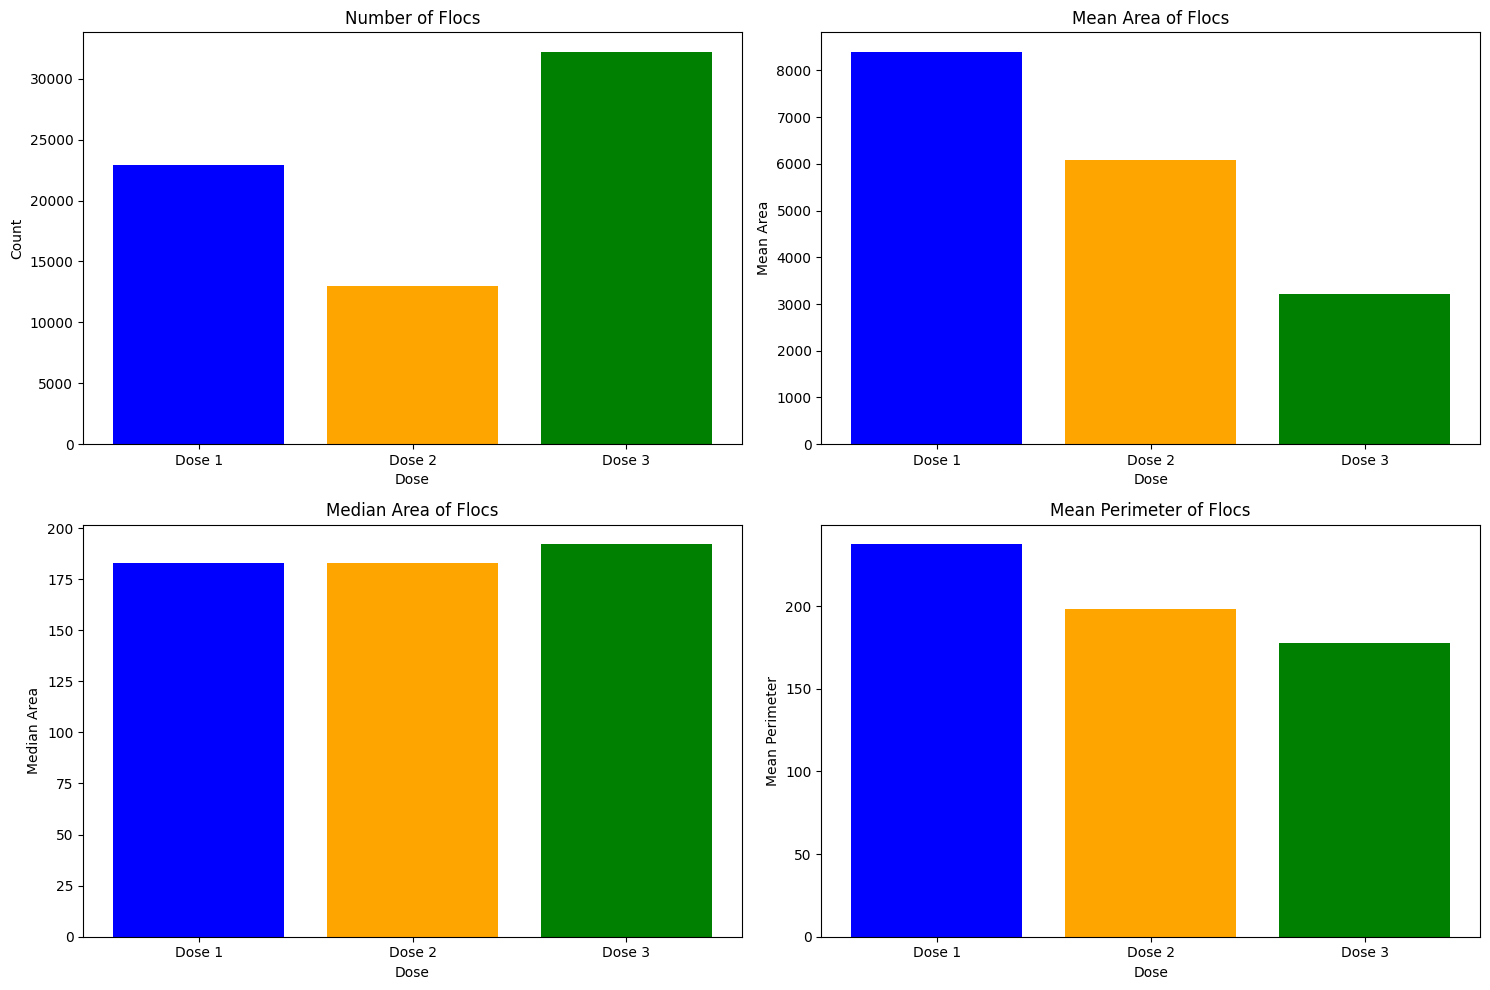

In [ ]:
# Analizar cada conjunto de imágenes
areas1, perimeters1 = analyze_images(images1)
areas2, perimeters2 = analyze_images(images2)
areas3, perimeters3 = analyze_images(images3)

# Crear un DataFrame para mostrar los resultados estadísticos
data = {
    'Dose': ['Dose 1', 'Dose 2', 'Dose 3'],
    'Number of Flocs': [len(areas1), len(areas2), len(areas3)],
    'Mean Area': [np.mean(areas1), np.mean(areas2), np.mean(areas3)],
    'Median Area': [np.median(areas1), np.median(areas2), np.median(areas3)],
    'Mean Perimeter': [np.mean(perimeters1), np.mean(perimeters2), np.mean(perimeters3)],
    'Median Perimeter': [np.median(perimeters1), np.median(perimeters2), np.median(perimeters3)]
}

df = pd.DataFrame(data)
print(df)

# Visualizar los resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(df['Dose'], df['Number of Flocs'], color=['blue', 'orange', 'green'])
plt.title('Number of Flocs')
plt.xlabel('Dose')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.bar(df['Dose'], df['Mean Area'], color=['blue', 'orange', 'green'])
plt.title('Mean Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Area')

plt.subplot(2, 2, 3)
plt.bar(df['Dose'], df['Median Area'], color=['blue', 'orange', 'green'])
plt.title('Median Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Median Area')

plt.subplot(2, 2, 4)
plt.bar(df['Dose'], df['Mean Perimeter'], color=['blue', 'orange', 'green'])
plt.title('Mean Perimeter of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Perimeter')

plt.tight_layout()
plt.show()


In [ ]:
def process_image(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar un filtro de suavizado para reducir el ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Aplicar ecualización del histograma para mejorar el contraste
    equalized = exposure.equalize_adapthist(blurred)

    # Convertir la imagen ecualizada a formato uint8
    equalized = (equalized * 255).astype(np.uint8)

    # Aplicar filtro de Canny para la detección de bordes
    edges = cv2.Canny(equalized, 100, 200)

    # Dilatar los bordes para cerrarlos
    dilated = cv2.dilate(edges, None, iterations=2)

    # Aplicar un umbral adaptativo para binarizar la imagen
    binary = cv2.adaptiveThreshold(dilated, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplicar operaciones morfológicas para eliminar el ruido
    binary = morphology.remove_small_objects(binary > 0, min_size=100)
    binary = morphology.remove_small_holes(binary, area_threshold=150)

    # Etiquetar las regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def analyze_flocs(labeled_image):
    # Obtener las propiedades de las regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Extraer áreas, perímetros y centroides
    areas = [prop.area for prop in properties]
    perimeters = [prop.perimeter for prop in properties]
    centroids = [prop.centroid for prop in properties]

    return areas, perimeters, centroids

def analyze_images(images):
    all_areas = []
    all_perimeters = []
    all_centroids = []

    for image in images:
        labeled_image = process_image(image)
        areas, perimeters, centroids = analyze_flocs(labeled_image)
        all_areas.extend(areas)
        all_perimeters.extend(perimeters)
        all_centroids.extend(centroids)

    return all_areas, all_perimeters, all_centroids


In [ ]:
import skimage.filters as filters

In [ ]:
!pip show skimage

In [ ]:
!pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


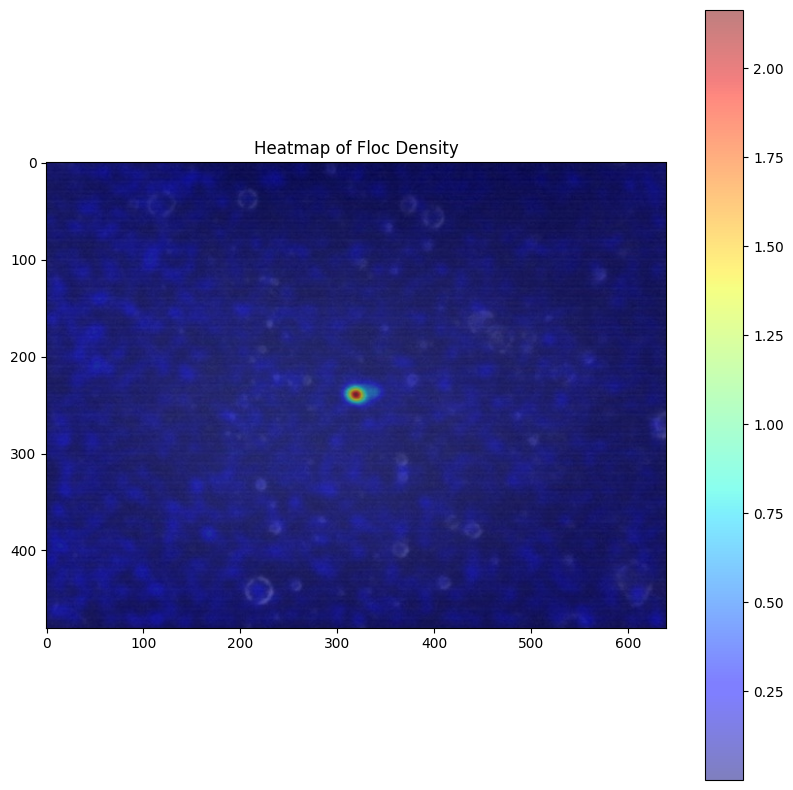

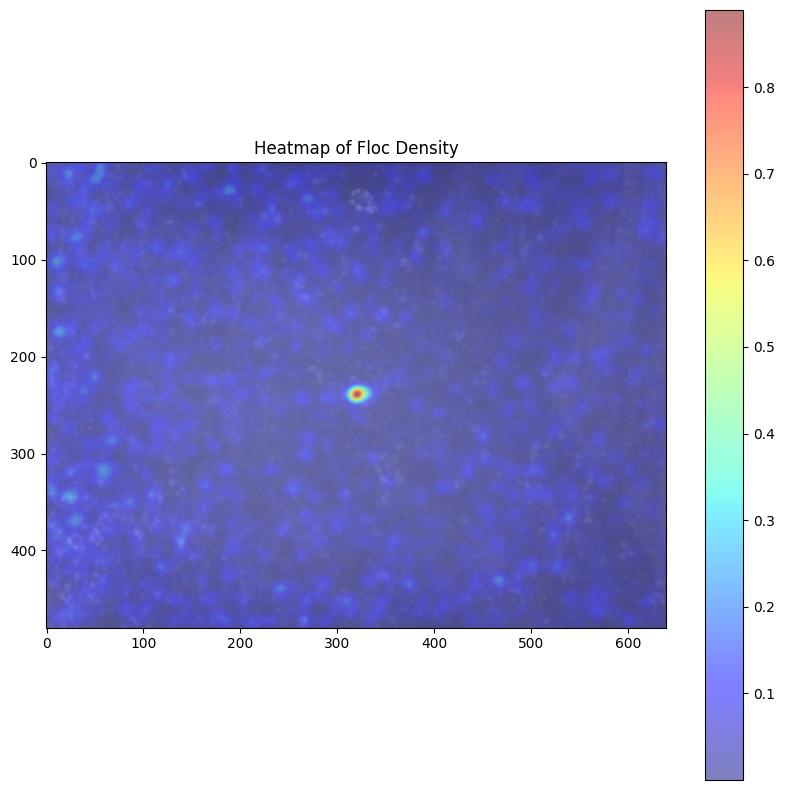

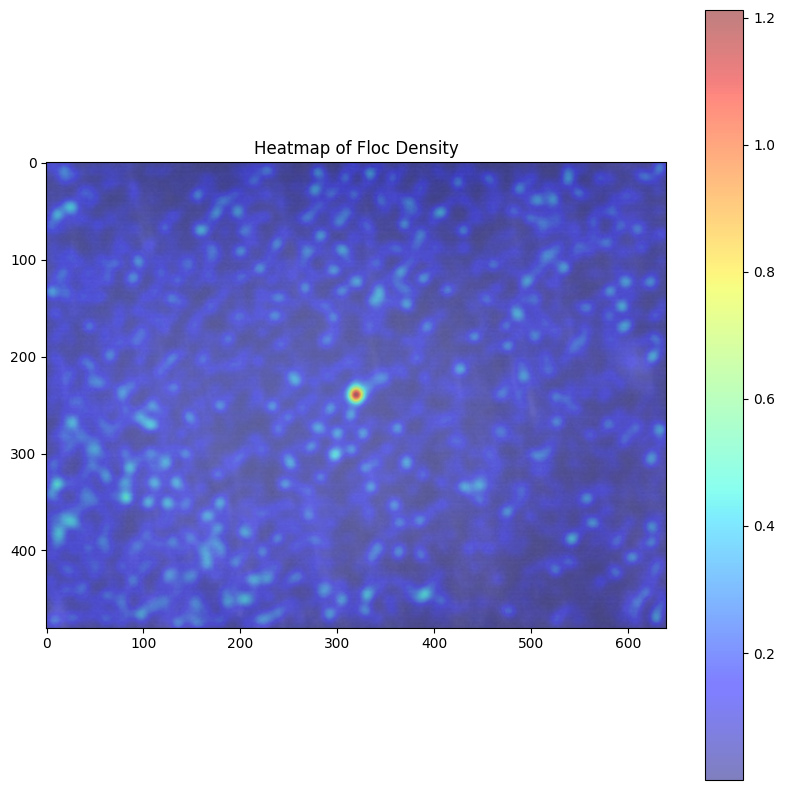

     Dose  Number of Flocs    Mean Area  Median Area  Mean Perimeter  \
0  Dose 1            22932  8392.650968        183.0      237.287439   
1  Dose 2            12963  6085.304559        183.0      198.371924   
2  Dose 3            32200  3219.001366        192.0      177.474152   

   Median Perimeter  
0         58.109650  
1         55.798990  
2         58.970563  


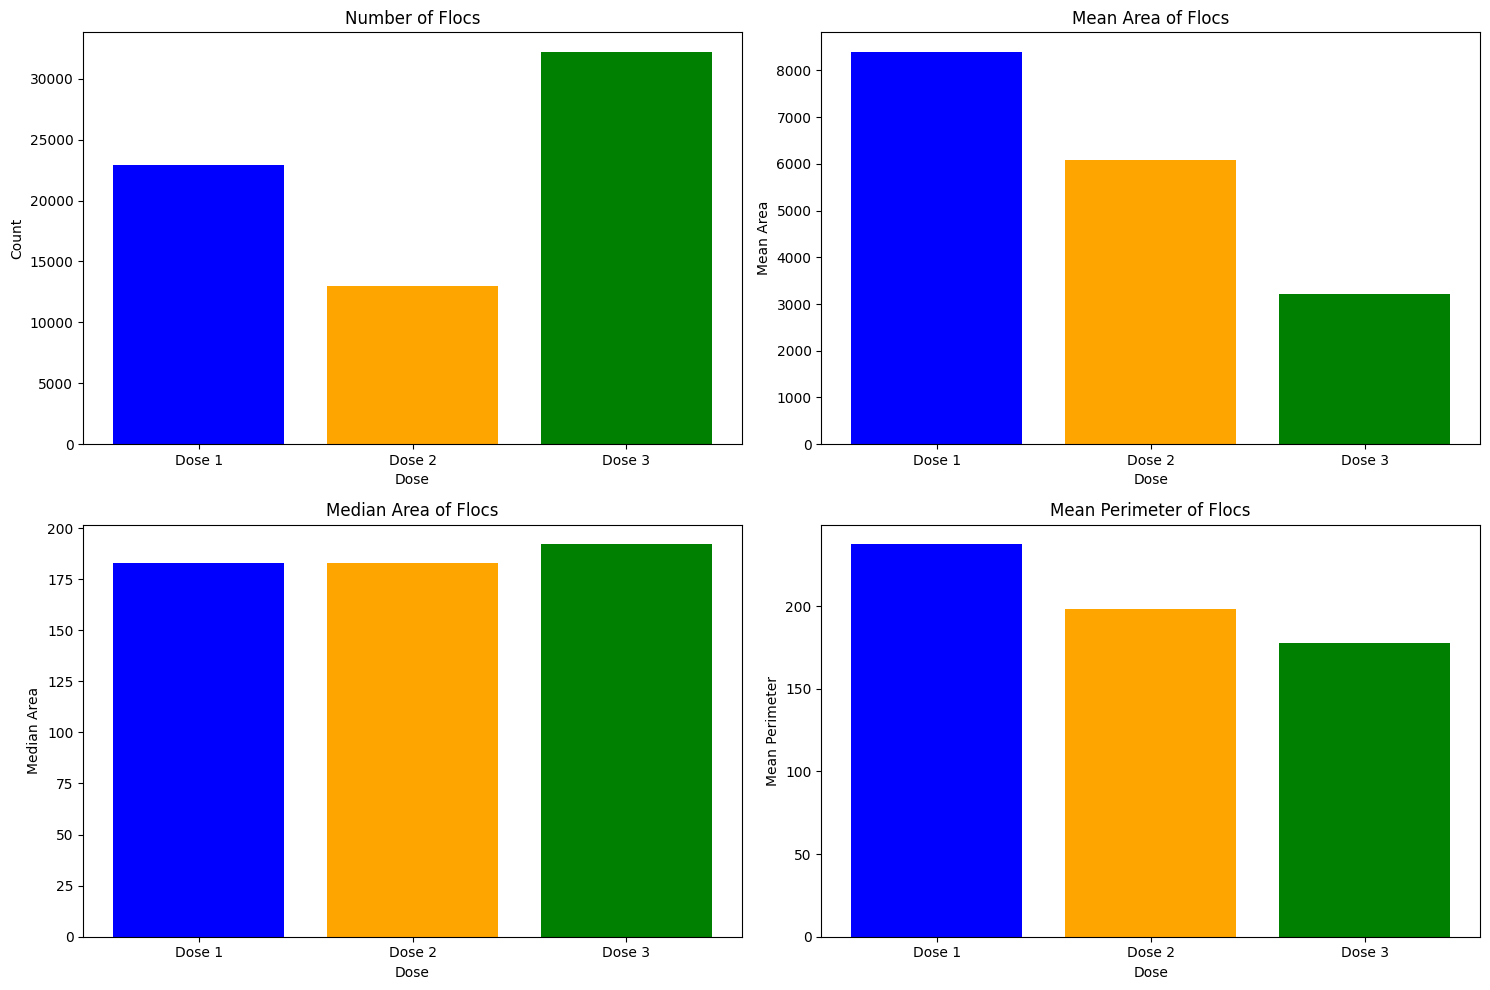

In [ ]:
def generate_heatmap(centroids, image_shape, grid_size=(50, 50)):
    heatmap = np.zeros(image_shape[:2])

    # Crear un mapa de calor basado en la densidad de flóculos
    for centroid in centroids:
        y, x = int(centroid[0]), int(centroid[1])
        heatmap[y, x] += 1

    # Suavizar el mapa de calor
    heatmap = filters.gaussian(heatmap, sigma=grid_size[0]/10)

    return heatmap

def plot_heatmap(image, heatmap):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.colorbar()
    plt.title('Heatmap of Floc Density')
    plt.show()

# Analizar cada conjunto de imágenes
areas1, perimeters1, centroids1 = analyze_images(images1)
areas2, perimeters2, centroids2 = analyze_images(images2)
areas3, perimeters3, centroids3 = analyze_images(images3)

# Crear un mapa de calor para cada dosis
heatmap1 = generate_heatmap(centroids1, images1[0].shape)
heatmap2 = generate_heatmap(centroids2, images2[0].shape)
heatmap3 = generate_heatmap(centroids3, images3[0].shape)

# Visualizar los mapas de calor
plot_heatmap(images1[0], heatmap1)
plot_heatmap(images2[0], heatmap2)
plot_heatmap(images3[0], heatmap3)

# Crear un DataFrame para mostrar los resultados estadísticos
data = {
    'Dose': ['Dose 1', 'Dose 2', 'Dose 3'],
    'Number of Flocs': [len(areas1), len(areas2), len(areas3)],
    'Mean Area': [np.mean(areas1), np.mean(areas2), np.mean(areas3)],
    'Median Area': [np.median(areas1), np.median(areas2), np.median(areas3)],
    'Mean Perimeter': [np.mean(perimeters1), np.mean(perimeters2), np.mean(perimeters3)],
    'Median Perimeter': [np.median(perimeters1), np.median(perimeters2), np.median(perimeters3)]
}

df = pd.DataFrame(data)
print(df)

# Visualizar los resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(df['Dose'], df['Number of Flocs'], color=['blue', 'orange', 'green'])
plt.title('Number of Flocs')
plt.xlabel('Dose')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.bar(df['Dose'], df['Mean Area'], color=['blue', 'orange', 'green'])
plt.title('Mean Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Area')

plt.subplot(2, 2, 3)
plt.bar(df['Dose'], df['Median Area'], color=['blue', 'orange', 'green'])
plt.title('Median Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Median Area')

plt.subplot(2, 2, 4)
plt.bar(df['Dose'], df['Mean Perimeter'], color=['blue', 'orange', 'green'])
plt.title('Mean Perimeter of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Perimeter')

plt.tight_layout()
plt.show()


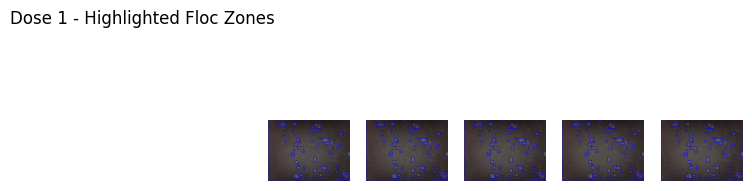

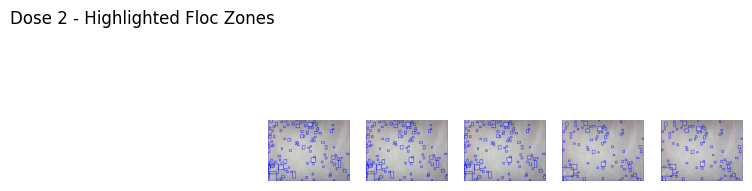

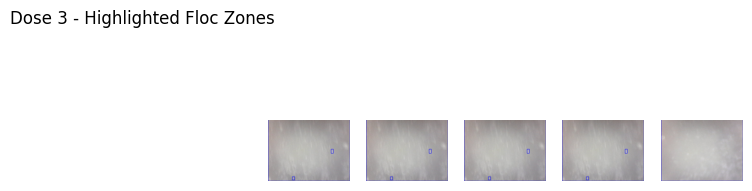

In [ ]:
highlighted_images1 = analyze_and_highlight_images(images1)
highlighted_images2 = analyze_and_highlight_images(images2)
highlighted_images3 = analyze_and_highlight_images(images3)


def display_images(images, title):
    plt.figure(figsize=(15, 10))
    for i, image in enumerate(images[:5]):
        plt.subplot(8, 12, i + 8)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_images(highlighted_images1, 'Dose 1 - Highlighted Floc Zones')
display_images(highlighted_images2, 'Dose 2 - Highlighted Floc Zones')
display_images(highlighted_images3, 'Dose 3 - Highlighted Floc Zones')


In [ ]:
def process_image(image):
    # Convertir a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Suavizado para reducir ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Ecualización de histograma para mejorar contraste
    equalized = exposure.equalize_adapthist(blurred)

    # Convertir a formato uint8
    equalized = (equalized * 255).astype(np.uint8)

    # Detección de bordes
    edges = cv2.Canny(equalized, 100, 200)

    # Dilatar los bordes
    dilated = cv2.dilate(edges, None, iterations=2)

    # Umbral adaptativo
    binary = cv2.adaptiveThreshold(dilated, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Operaciones morfológicas para eliminar ruido
    binary = morphology.remove_small_objects(binary > 0, min_size=100)
    binary = morphology.remove_small_holes(binary, area_threshold=150)

    # Etiquetar regiones conectadas
    labeled_image = measure.label(binary)

    return labeled_image

def calculate_volume(area):
    # Asumir una forma esférica y calcular volumen
    volume = (4/3) * np.pi * (np.sqrt(area / np.pi))**3
    return volume

def analyze_flocs(labeled_image):
    # Propiedades de regiones etiquetadas
    properties = measure.regionprops(labeled_image)

    # Áreas, perímetros, centroides y volúmenes
    areas = [prop.area for prop in properties]
    perimeters = [prop.perimeter for prop in properties]
    centroids = [prop.centroid for prop in properties]
    volumes = [calculate_volume(prop.area) for prop in properties]

    return areas, perimeters, centroids, volumes

def analyze_images(images):
    all_areas = []
    all_perimeters = []
    all_centroids = []
    all_volumes = []

    for image in images:
        labeled_image = process_image(image)
        areas, perimeters, centroids, volumes = analyze_flocs(labeled_image)
        all_areas.extend(areas)
        all_perimeters.extend(perimeters)
        all_centroids.extend(centroids)
        all_volumes.extend(volumes)

    return all_areas, all_perimeters, all_centroids, all_volumes


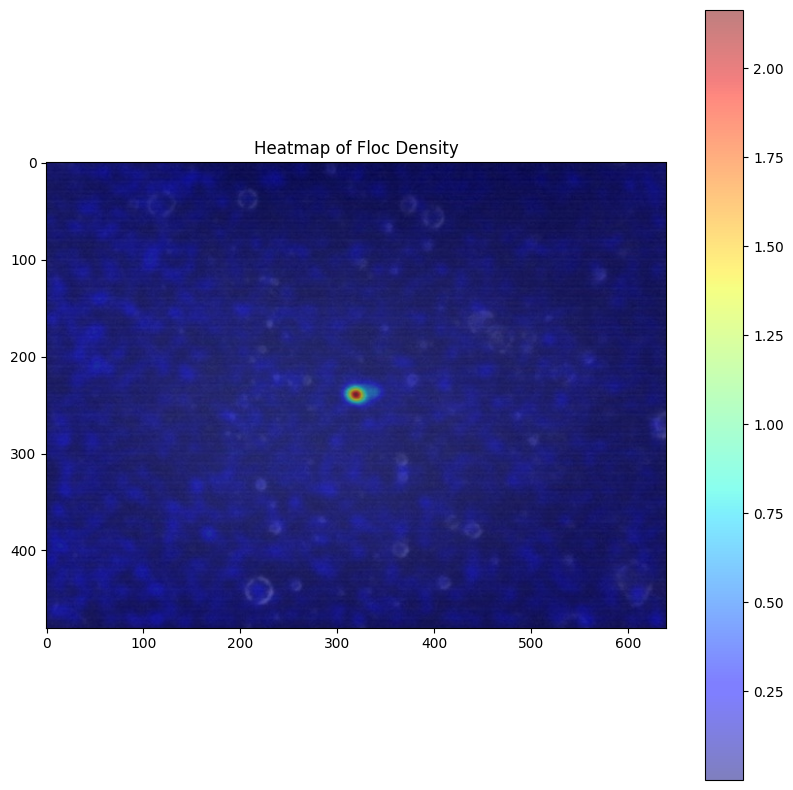

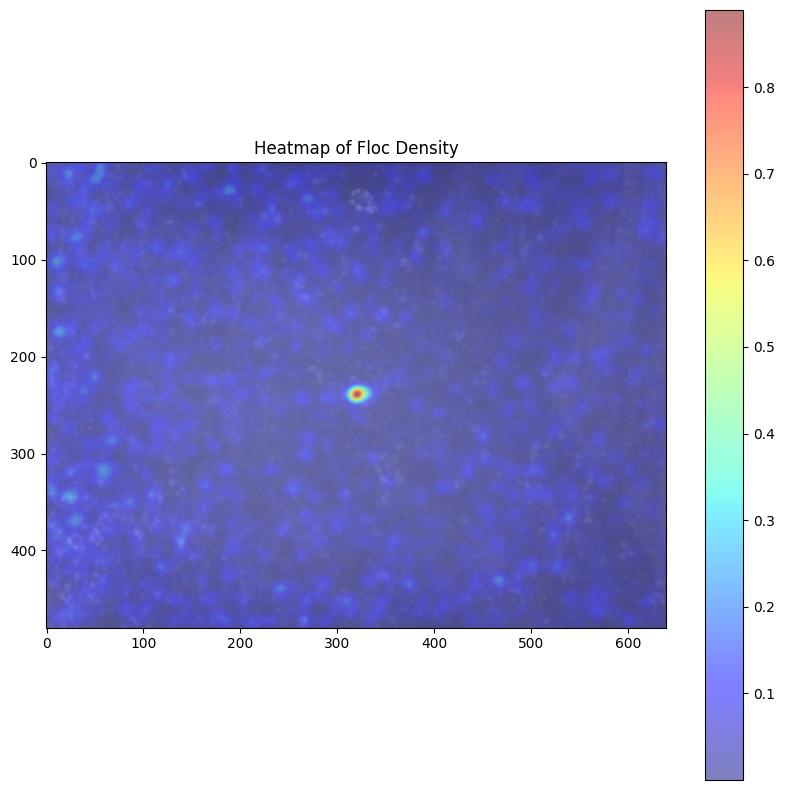

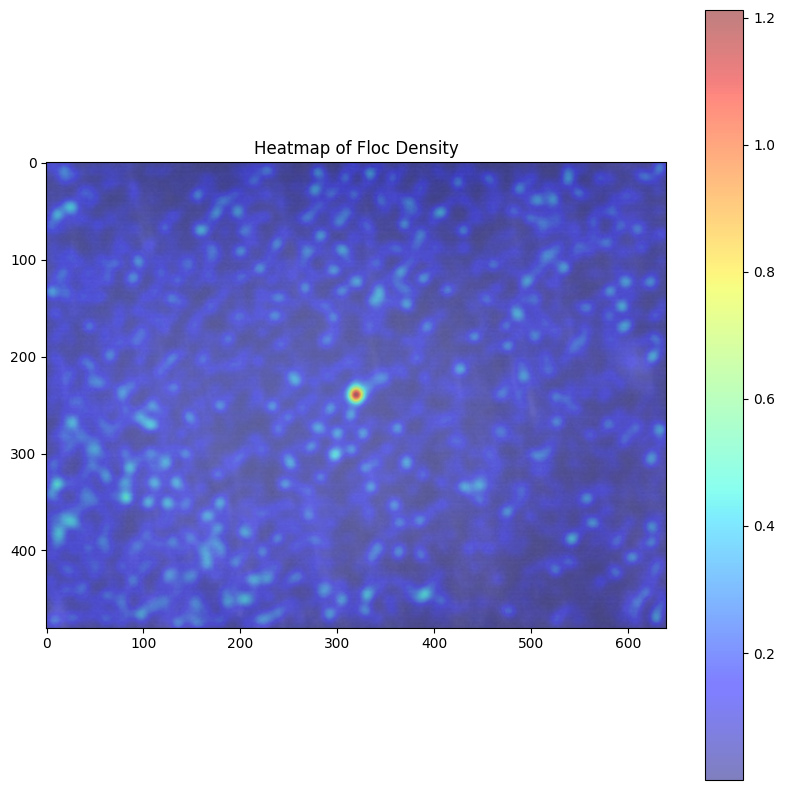

     Dose  Number of Flocs    Mean Area  Median Area  Mean Perimeter  \
0  Dose 1            22932  8392.650968        183.0      237.287439   
1  Dose 2            12963  6085.304559        183.0      198.371924   
2  Dose 3            32200  3219.001366        192.0      177.474152   

   Median Perimeter   Mean Volume  Median Volume  
0         58.109650  3.247285e+06    1862.260514  
1         55.798990  2.302533e+06    1862.260514  
2         58.970563  1.084004e+06    2001.315889  


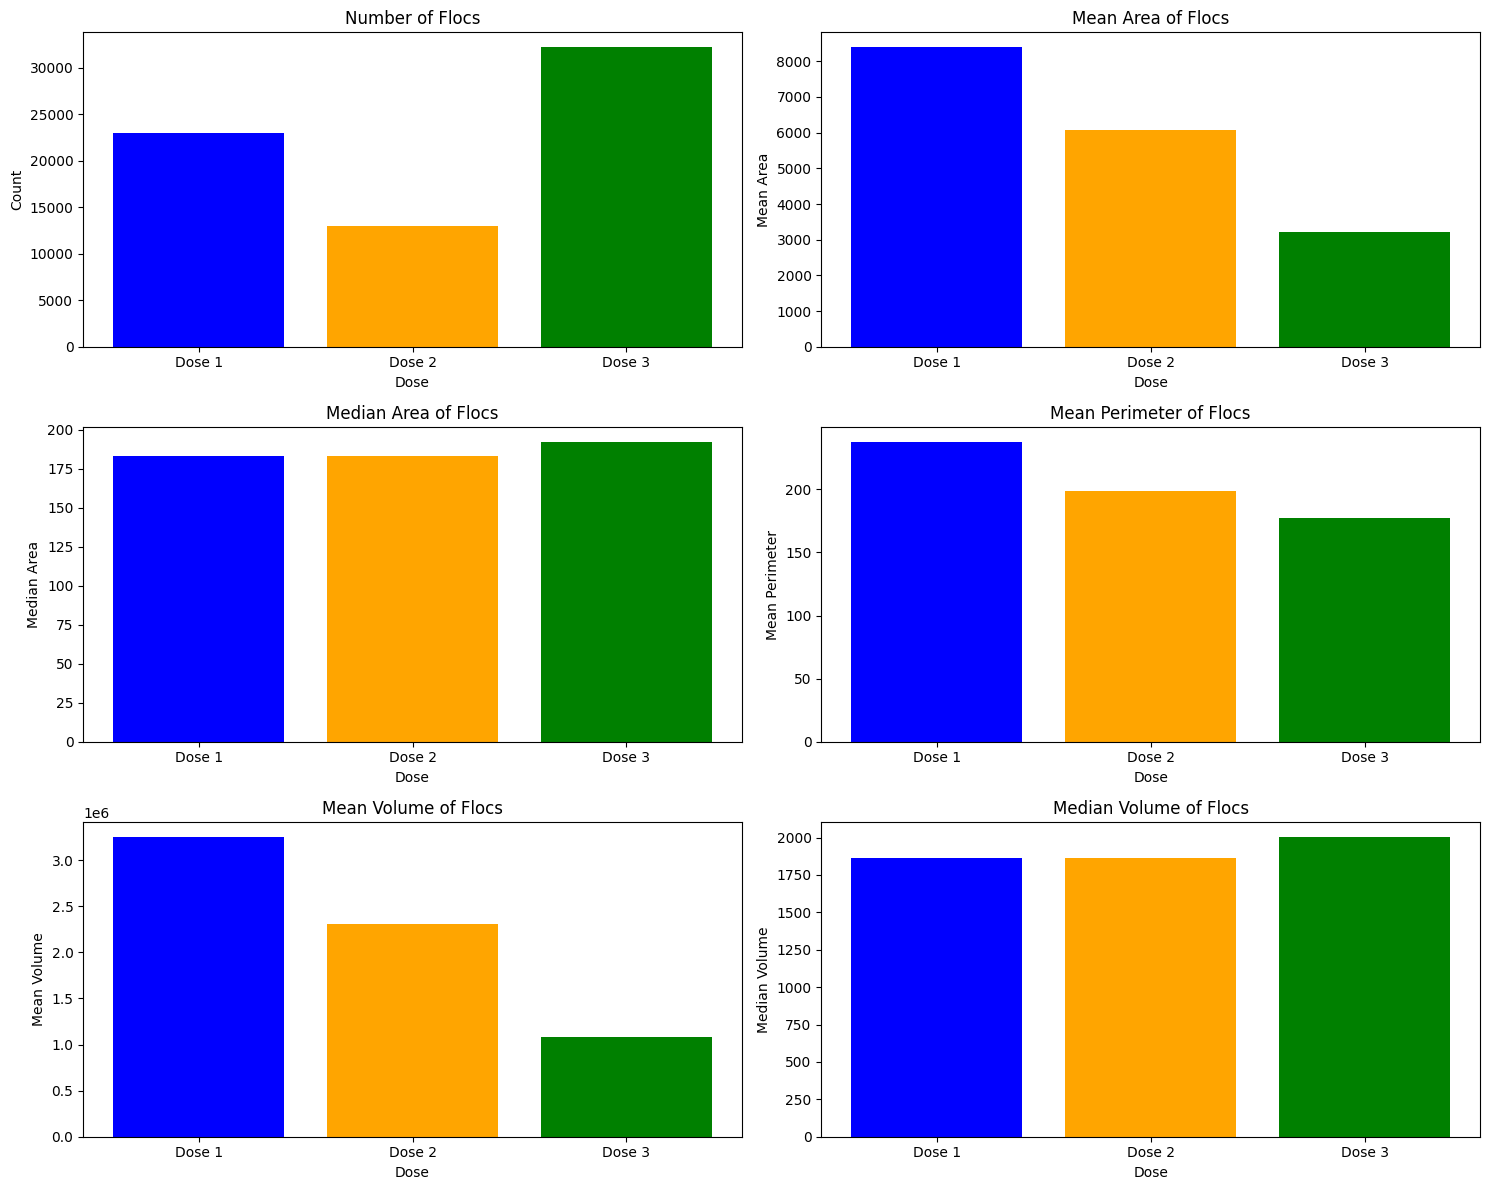

In [ ]:
def generate_heatmap(centroids, image_shape, grid_size=(50, 50)):
    heatmap = np.zeros(image_shape[:2])

    # Crear mapa de calor basado en densidad de flóculos
    for centroid in centroids:
        y, x = int(centroid[0]), int(centroid[1])
        heatmap[y, x] += 1

    # Suavizar el mapa de calor
    heatmap = filters.gaussian(heatmap, sigma=grid_size[0]/10)

    return heatmap

def plot_heatmap(image, heatmap):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.colorbar()
    plt.title('Heatmap of Floc Density')
    plt.show()

# Analizar cada conjunto de imágenes
areas1, perimeters1, centroids1, volumes1 = analyze_images(images1)
areas2, perimeters2, centroids2, volumes2 = analyze_images(images2)
areas3, perimeters3, centroids3, volumes3 = analyze_images(images3)

# Crear mapa de calor para cada dosis
heatmap1 = generate_heatmap(centroids1, images1[0].shape)
heatmap2 = generate_heatmap(centroids2, images2[0].shape)
heatmap3 = generate_heatmap(centroids3, images3[0].shape)

# Visualizar mapas de calor
plot_heatmap(images1[0], heatmap1)
plot_heatmap(images2[0], heatmap2)
plot_heatmap(images3[0], heatmap3)

# Crear DataFrame con resultados estadísticos
data = {
    'Dose': ['Dose 1', 'Dose 2', 'Dose 3'],
    'Number of Flocs': [len(areas1), len(areas2), len(areas3)],
    'Mean Area': [np.mean(areas1), np.mean(areas2), np.mean(areas3)],
    'Median Area': [np.median(areas1), np.median(areas2), np.median(areas3)],
    'Mean Perimeter': [np.mean(perimeters1), np.mean(perimeters2), np.mean(perimeters3)],
    'Median Perimeter': [np.median(perimeters1), np.median(perimeters2), np.median(perimeters3)],
    'Mean Volume': [np.mean(volumes1), np.mean(volumes2), np.mean(volumes3)],
    'Median Volume': [np.median(volumes1), np.median(volumes2), np.median(volumes3)]
}

df = pd.DataFrame(data)
print(df)

# Visualizar resultados
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.bar(df['Dose'], df['Number of Flocs'], color=['blue', 'orange', 'green'])
plt.title('Number of Flocs')
plt.xlabel('Dose')
plt.ylabel('Count')

plt.subplot(3, 2, 2)
plt.bar(df['Dose'], df['Mean Area'], color=['blue', 'orange', 'green'])
plt.title('Mean Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Area')

plt.subplot(3, 2, 3)
plt.bar(df['Dose'], df['Median Area'], color=['blue', 'orange', 'green'])
plt.title('Median Area of Flocs')
plt.xlabel('Dose')
plt.ylabel('Median Area')

plt.subplot(3, 2, 4)
plt.bar(df['Dose'], df['Mean Perimeter'], color=['blue', 'orange', 'green'])
plt.title('Mean Perimeter of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Perimeter')

plt.subplot(3, 2, 5)
plt.bar(df['Dose'], df['Mean Volume'], color=['blue', 'orange', 'green'])
plt.title('Mean Volume of Flocs')
plt.xlabel('Dose')
plt.ylabel('Mean Volume')

plt.subplot(3, 2, 6)
plt.bar(df['Dose'], df['Median Volume'], color=['blue', 'orange', 'green'])
plt.title('Median Volume of Flocs')
plt.xlabel('Dose')
plt.ylabel('Median Volume')

plt.tight_layout()
plt.show()
